In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

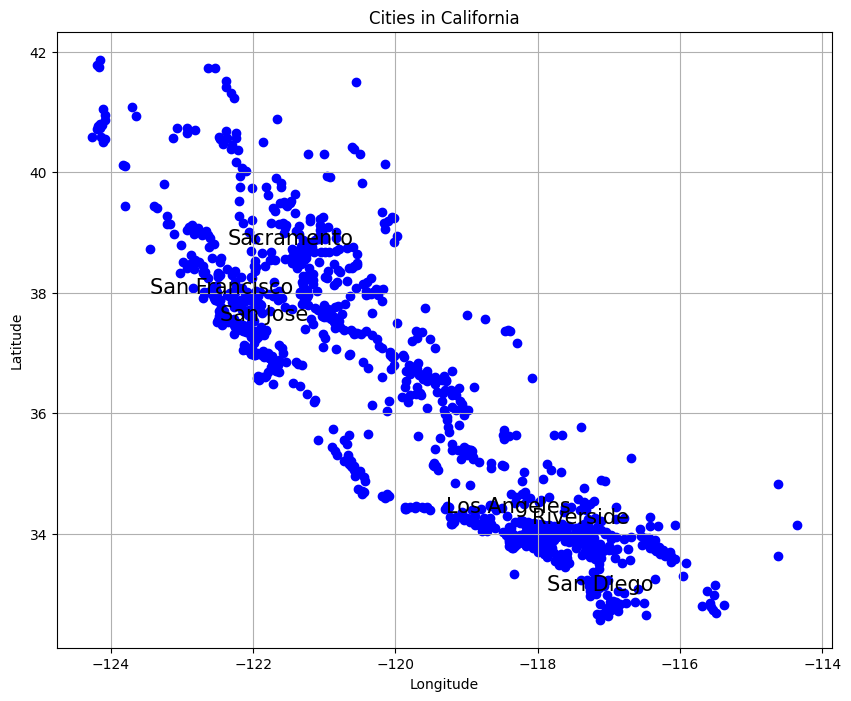

In [6]:
Cities = r"C:\Users\chewb\Desktop\Math_140_project\uscities.csv"
Cities_df = pd.read_csv(Cities)

# Filter rows where state_id is 'CA'
ca_df = Cities_df[Cities_df['state_id'] == 'CA']
# Select only the desired columns
selected_columns = ['city_ascii', 'lat', 'lng', 'population']
z_df = ca_df[selected_columns]

# Filter rows where population is greater than 0
df = z_df[z_df['population'] > 1000]

plt.figure(figsize=(10, 8))  # Set the figure size

# Scatter plot of cities
plt.scatter(df['lng'], df['lat'], color='blue')

# Add labels for cities with population > 1,000,000
for index, row in df.iterrows():
    if row['population'] > 1000000:
        plt.annotate(row['city_ascii'], (row['lng'], row['lat']), 
                     textcoords="offset points", xytext=(0,10), ha='center', fontsize=15, color='black')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cities in California')

# Show plot
plt.grid(True)  # Show grid
plt.show()

The next city from Los Angeles with the lowest distance/population ratio is: Riverside
Distance/Population Ratio: 0.00 km per person


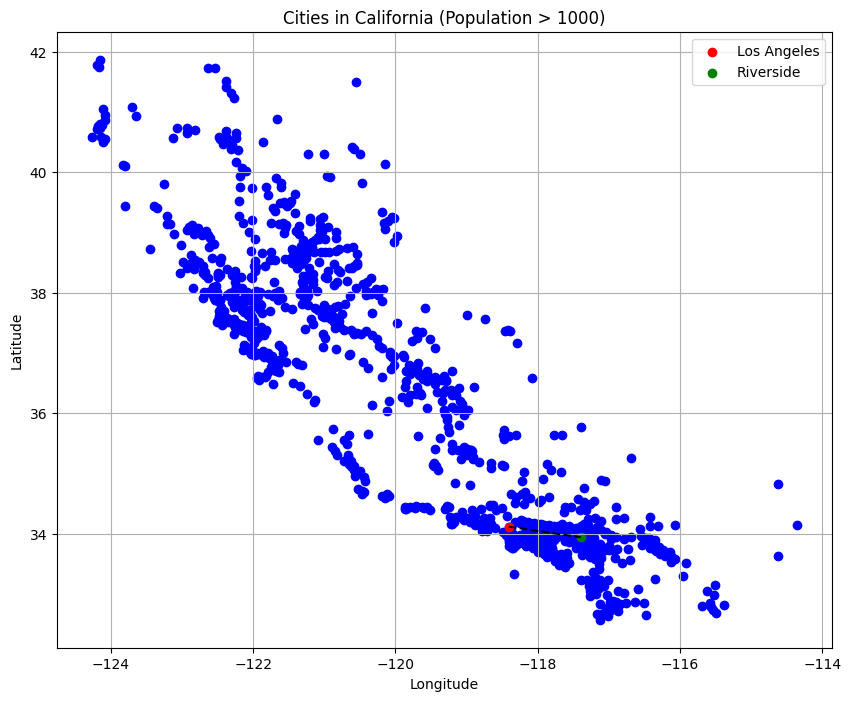

In [7]:
# Function to calculate distance between two geographical points using Haversine formula
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula to calculate distance
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of Earth in kilometers
    R = 6371.0  # Earth radius in kilometers
    distance = R * c
    return distance

# Los Angeles coordinates (assuming Los Angeles is in your filtered dataframe)
la_lat, la_lng = df[df['city_ascii'] == 'Los Angeles']['lat'].values[0], df[df['city_ascii'] == 'Los Angeles']['lng'].values[0]

# Initialize variables to track the city with the minimum distance/population ratio
min_ratio = float('inf')
next_city = None
next_city_lat, next_city_lng = None, None

# Iterate through cities in the dataframe starting from Los Angeles
for index, row in df.iterrows():
    if row['city_ascii'] != 'Los Angeles':  # Exclude Los Angeles itself
        city_lat, city_lng = row['lat'], row['lng']
        city_population = row['population']
        
        # Calculate distance between Los Angeles and the current city
        distance = haversine_distance(la_lat, la_lng, city_lat, city_lng)
        
        # Calculate distance/population ratio
        if city_population > 0:
            ratio = distance*2 / city_population
        else:
            ratio = float('inf')  # Handle division by zero or very small populations
        
        # Update minimum ratio and track the next city with the lowest ratio
        if ratio < min_ratio:
            min_ratio = ratio
            next_city = row['city_ascii']
            next_city_lat, next_city_lng = city_lat, city_lng

# Display the next city with the lowest distance/population ratio
if next_city:
    print(f"The next city from Los Angeles with the lowest distance/population ratio is: {next_city}")
    print(f"Distance/Population Ratio: {min_ratio:.2f} km per person")
    
    # Plotting cities and line from Los Angeles to the next city
    plt.figure(figsize=(10, 8))  # Set the figure size

    # Scatter plot of cities
    plt.scatter(df['lng'], df['lat'], color='blue')

    # Plot Los Angeles
    plt.scatter(la_lng, la_lat, color='red', label='Los Angeles')

    # Plot the next city
    plt.scatter(next_city_lng, next_city_lat, color='green', label=next_city)

    # Plot line from Los Angeles to the next city
    plt.plot([la_lng, next_city_lng], [la_lat, next_city_lat], color='black', linestyle='--')

    # Add labels, title, legend, and grid
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Cities in California (Population > 1000)')
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()
else:
    print("No valid city found with a non-zero population.")


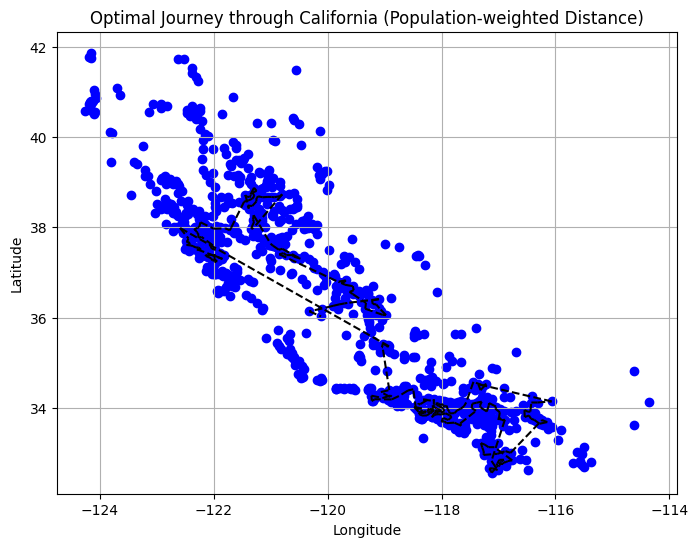

In [12]:
# Function to calculate distance between two geographical points using Haversine formula
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula to calculate distance
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of Earth in kilometers
    R = 6371.0  # Earth radius in kilometers
    distance = R * c
    return distance

# Start from Los Angeles (assuming Los Angeles is in your filtered dataframe)
current_city = 'Los Angeles'
visited_cities = [current_city]
total_ratio = 0.0

while total_ratio < 1:
    # Get current city details
    current_city_details = df[df['city_ascii'] == current_city].iloc[0]
    current_lat, current_lng = current_city_details['lat'], current_city_details['lng']
    
    # Initialize variables to find the next optimal city
    min_ratio = float('inf')
    next_city = None
    
    # Iterate through cities in the dataframe to find the next city with the lowest distance/population ratio
    for index, row in df.iterrows():
        if row['city_ascii'] not in visited_cities:  # Visit each city only once
            city_lat, city_lng = row['lat'], row['lng']
            city_population = row['population']
            
            # Calculate distance between current city and the candidate city
            distance = haversine_distance(current_lat, current_lng, city_lat, city_lng)
            
            # Calculate distance/population ratio
            if city_population > 0:
                ratio = distance**2 / city_population
            else:
                ratio = float('inf')  # Handle division by zero or very small populations
            
            # Update minimum ratio and track the next city with the lowest ratio
            if ratio < min_ratio:
                min_ratio = ratio
                next_city = row['city_ascii']
    
    # If a next city is found
    if next_city:
        # Update total ratio
        total_ratio += min_ratio
        
        # Print details of the next city
        print(f"Moving from {current_city} to {next_city} (Distance/Population Ratio: {min_ratio:.2f})")
        
        # Update current city and mark it as visited
        current_city = next_city
        visited_cities.append(next_city)
    else:
        # No valid next city found
        break

print(f"Total Distance/Population Ratio: {total_ratio:.2f}")

# Plotting the journey on the map (scatter plot with lines)
plt.figure(figsize=(10, 8))

# Scatter plot of cities
plt.scatter(df['lng'], df['lat'], color='blue')

# Plot the journey with lines
for i in range(len(visited_cities) - 1):
    start_city = visited_cities[i]
    end_city = visited_cities[i + 1]
    
    start_city_details = df[df['city_ascii'] == start_city].iloc[0]
    end_city_details = df[df['city_ascii'] == end_city].iloc[0]
    
    plt.plot([start_city_details['lng'], end_city_details['lng']], 
             [start_city_details['lat'], end_city_details['lat']], 
             color='black', linestyle='--')

# Add labels, title, and grid
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Optimal Journey through California (Population-weighted Distance)')
plt.grid(True)

# Show plot
plt.show()


In [14]:
from itertools import permutations

# Select the 5 largest population cities
largest_cities = df.nlargest(5, 'population')

# Generate all permutations of paths among the 5 cities
all_permutations = permutations(largest_cities['city_ascii'])

# Initialize variables to track the optimal path and its distance
optimal_path = None
min_total_distance = float('inf')

# Iterate through all permutations and calculate the total distance for each path
for perm in all_permutations:
    total_distance = 0.0
    prev_city = 'Los Angeles'  # Start from Los Angeles
    
    for city in perm:
        city_details = df[df['city_ascii'] == city].iloc[0]
        city_lat, city_lng = city_details['lat'], city_details['lng']
        prev_city_details = df[df['city_ascii'] == prev_city].iloc[0]
        prev_lat, prev_lng = prev_city_details['lat'], prev_city_details['lng']
        
        distance = haversine_distance(prev_lat, prev_lng, city_lat, city_lng)
        total_distance += distance
        prev_city = city
    
    # Add the distance back to Los Angeles to complete the cycle
    final_city_details = df[df['city_ascii'] == 'Los Angeles'].iloc[0]
    final_lat, final_lng = final_city_details['lat'], final_city_details['lng']
    distance_to_start = haversine_distance(prev_lat, prev_lng, final_lat, final_lng)
    total_distance += distance_to_start
    
    # Check if this path has the minimum total distance
    if total_distance < min_total_distance:
        min_total_distance = total_distance
        optimal_path = perm

# Print the optimal path and its total distance
print("Optimal Path:")
for city in optimal_path:
    print(city)
print(f"Total Distance: {min_total_distance:.2f} km")


Optimal Path:
Los Angeles
San Francisco
Sacramento
Riverside
San Diego
Total Distance: 1520.30 km
